In [6]:
import pandas as pd
import os

directory = '../Clean/'
dataframes_list = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        dataframes_list.append(pd.read_csv(file_path))

df_bank_usage = pd.concat(dataframes_list, ignore_index=True)
display(df_bank_usage)

,MeasureName,MonthYear,M_Value,TransType,ChannelType,UsageType
0,volume_k,DEC 2023,1945084.36,PromptPay,PromptPay,NaN
1,value_b,DEC 2023,4306.92,PromptPay,PromptPay,NaN
2,volume_k,NOV 2023,1831500.67,PromptPay,PromptPay,NaN
3,value_b,NOV 2023,3938.75,PromptPay,PromptPay,NaN
4,volume_k,OCT 2023,1819965.80,PromptPay,PromptPay,NaN
...,...,...,...,...,...,...
1147,value_b,JAN 2020,555.00,Plastic cards,Debit card,for cash withdrawal
1148,value_b,JAN 2020,23.00,Plastic cards,Debit card,for purchasing purpose via EFTPOS
1149,value_b,JAN 2020,173.00,Plastic cards,Debit card,for other purposes
1150,value_b,JAN 2020,143.00,Plastic cards,Credit card,for purchasing purpose


In [7]:
# Adjust value from billions to normal unit.
#df_bank_usage['M_Value'] = df_bank_usage.apply(lambda x: x['M_Value'] * 1000000 if x['MeasureName'] == 'value_b' else x['M_Value'], axis=1)
#df_bank_usage['MeasureName'] = df_bank_usage.apply(lambda x: 'value' if x['MeasureName'] == 'value_b' else x['MeasureName'], axis=1)

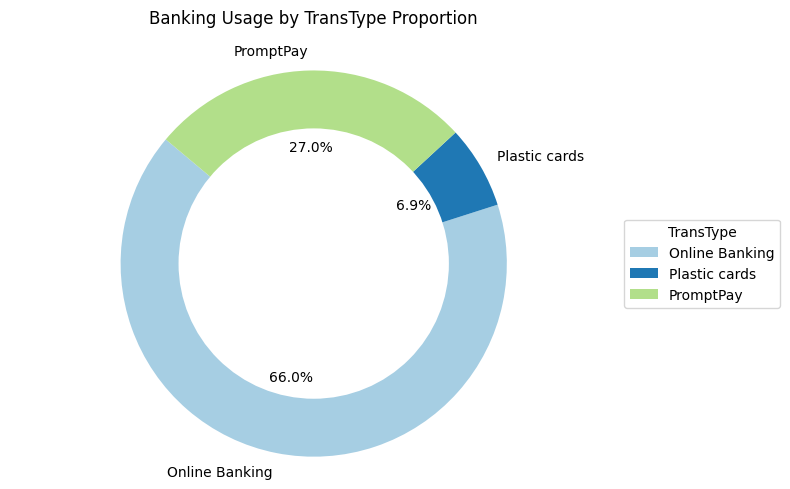

In [8]:
import matplotlib.pyplot as plt

# Group by 'TransType', then sum 'M_Value'
grouped_df1 = df_bank_usage[df_bank_usage['MeasureName']== 'value_b'].groupby('TransType')['M_Value'].sum()

# Plot a donut chart
fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(grouped_df1, labels=grouped_df1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.title('Banking Usage by TransType Proportion', pad=20)
plt.legend(wedges, grouped_df1.index, title="TransType", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

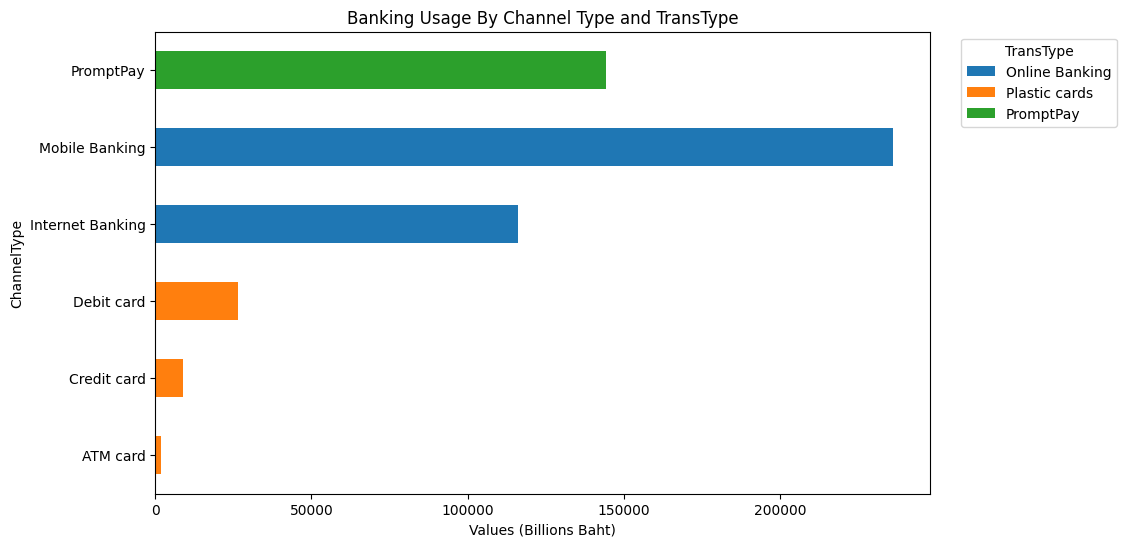

In [9]:
# Group by 'ChannelType' and 'TransType', then sum 'M_Value'
grouped_df2 = df_bank_usage[df_bank_usage['MeasureName']== 'value_b'].groupby(['ChannelType', 'TransType'])['M_Value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = grouped_df2.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel('Values (Billions Baht)')
plt.ylabel('ChannelType')
plt.title('Banking Usage By Channel Type and TransType')
plt.legend(title='TransType', bbox_to_anchor=(1.25, 1))
#plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

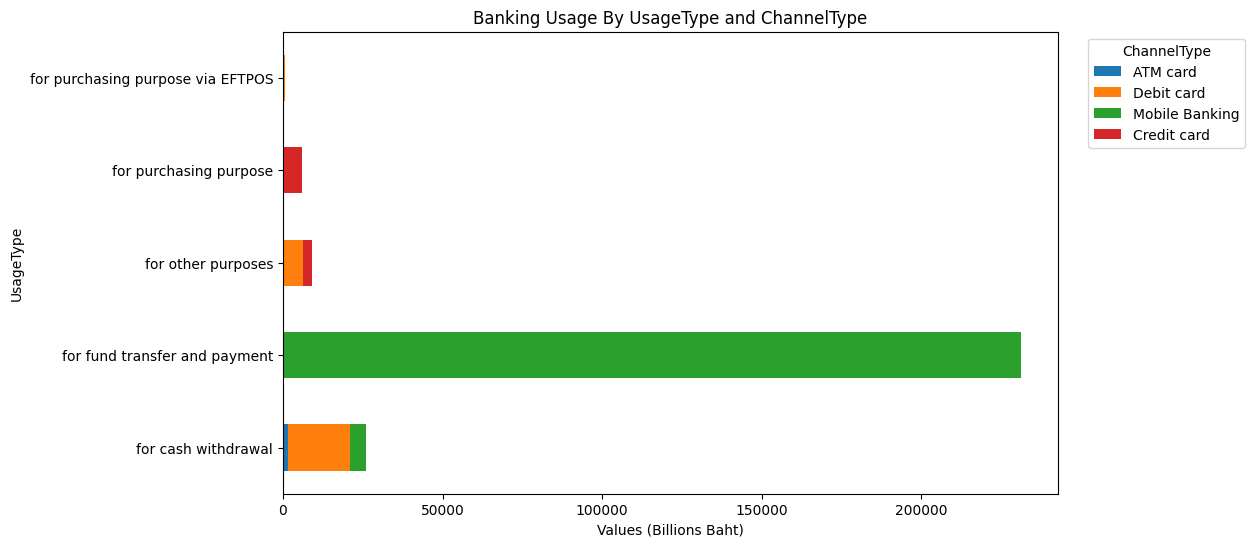

In [10]:
# Group by 'UsageType' and 'ChannelType', then sum 'M_Value'
grouped_df3 = df_bank_usage[df_bank_usage['MeasureName']== 'value_b'].groupby(['UsageType', 'ChannelType'])['M_Value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = grouped_df3.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel('Values (Billions Baht)')
plt.ylabel('UsageType')
plt.title('Banking Usage By UsageType and ChannelType')
plt.legend(title='ChannelType', bbox_to_anchor=(1.25, 1))
#plt.tight_layout()
plt.show()